In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [354]:
df = pd.read_csv("C:/Users/ALGORITHM/Documents/DATA SET/laptops_dataset.csv")

In [355]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [356]:
df.columns = df.columns.str.replace(" ", "_").str.lower()

In [357]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [358]:
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [359]:
df.isna().sum()

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64

In [360]:
df.storage_type.unique()

array(['SSD', 'eMMC', nan], dtype=object)

In [361]:
df.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [362]:
df.screen.unique()

array([15.6 , 17.3 , 14.  , 16.1 , 13.3 , 16.  , 13.6 , 17.  , 15.3 ,
       14.5 , 13.4 , 14.2 , 18.  , 14.1 , 12.4 , 13.5 , 16.2 , 15.  ,
       11.6 , 13.  , 10.5 , 14.4 ,   nan, 12.3 , 15.4 , 12.5 , 10.1 ,
       10.95, 12.  , 13.9 ])

In [363]:
df = df.fillna(df.mean(numeric_only = True))
df = df.fillna(df.mode().loc[0])

In [364]:
df.isna().any()

laptop          False
status          False
brand           False
model           False
cpu             False
ram             False
storage         False
storage_type    False
gpu             False
screen          False
touch           False
final_price     False
dtype: bool

<Axes: xlabel='screen', ylabel='final_price'>

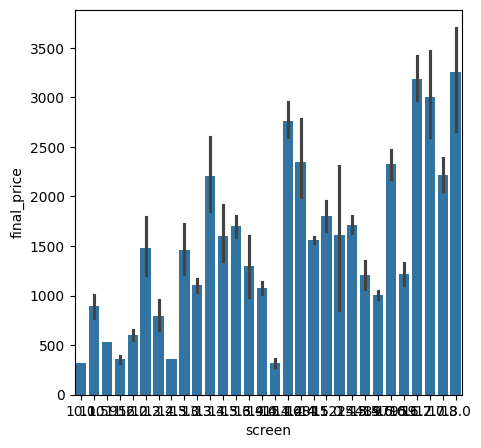

In [365]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x = "screen", y = "final_price", data = df)

In [366]:
df[["screen"]].corrwith(df.final_price)

screen    0.268169
dtype: float64

In [367]:
df[["ram"]].corrwith(df.final_price)

ram    0.724946
dtype: float64

<Axes: xlabel='ram', ylabel='final_price'>

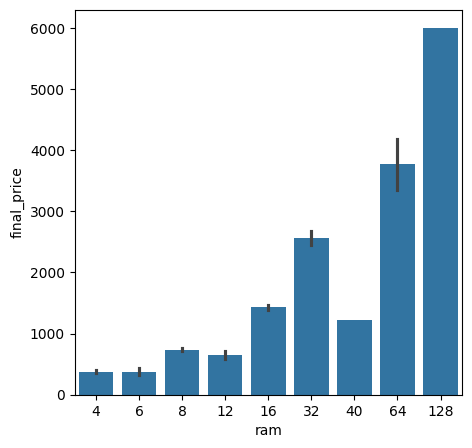

In [368]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x= "ram", y = "final_price",data = df)

In [369]:
for c in df.columns:
    print(c)
    print(df[c].unique()[:6])
    print(df[c].nunique())
    print()

laptop
['ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core i5-1235U/8GB/512GB SSD/15.6"'
 'Alurin Go Start Intel Celeron N4020/8GB/256GB SSD/15.6"'
 'ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core i3-1215U/8GB/256GB SSD/15.6"'
 'MSI Katana GF66 12UC-082XES Intel Core i7-12700H/16GB/1TB SSD/RTX3050/15.6"'
 'HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB SSD/15.6"'
 'MSI Crosshair 17 C12VF-264XES Intel Core i7-12650H/32GB/1TB SSD/RTX 4060/17.3"']
2160

status
['New' 'Refurbished']
2

brand
['Asus' 'Alurin' 'MSI' 'HP' 'Lenovo' 'Medion']
27

model
['ExpertBook' 'Go' 'Katana' '15S' 'Crosshair' 'ThinkPad']
121

cpu
['Intel Core i5' 'Intel Celeron' 'Intel Core i3' 'Intel Core i7'
 'AMD Ryzen 5' 'AMD Ryzen 7']
28

ram
[ 8 16 32 12  4 64]
9

storage
[ 512  256 1000   64  128   32]
12

storage_type
['SSD' 'eMMC']
2

gpu
['RTX 3050' 'RTX 4060' 'RTX 4050' 'RTX 3060' 'RTX 4070' 'RTX 2050']
44

screen
[15.6 17.3 14.  16.1 13.3 16. ]
30

touch
['No' 'Yes']
2

final_price
[1009.    299.    789.   1199.  

In [370]:
df.final_price.max()

7150.47

In [371]:
df.model.unique()

array(['ExpertBook', 'Go', 'Katana', '15S', 'Crosshair', 'ThinkPad',
       'VivoBook', 'Akoya', 'Victus', 'V15', 'Thin', 'ROG', 'IdeaPad',
       'Cyborg', 'M515UA', 'TUF', 'Aspire', 'Pavilion', 'Vector',
       'Chromebook', 'Omen', 'ZenBook', 'Creator', 'MacBook Air',
       'ThinkBook', '250', 'Modern', '255', 'MacBook Pro', 'Prestige',
       'Stealth', 'Pulse', 'Blade', 'Legion', 'Raider', 'ProBook', 'F515',
       'G5', 'Vostro', 'Nitro', 'Gram', 'E410', 'Flex Advance', 'Bravo',
       'Aero', 'Yoga', 'Galaxy Book', 'Erazer', 'Summit', 'Ultra',
       'Extensa', 'Flex', 'EliteBook', 'Revolt', 'Latitude', 'Envy',
       'Deputy', 'Predator', 'Surface Laptop', '14w', 'Titan', 'Ioxbook',
       'Aorus', 'Swift', 'Surface Go', 'Netbook Pro', 'Surface Pro',
       'Notebook', '470', 'Spectre', 'Alurin', 'Satellite Pro', 'XPS',
       'ConceptD', 'E510', 'Beast', 'TravelMate', 'Portégé', 'Tecra',
       'Neo', 'Electronics', '14S', 'Classmate Pro', '17', 'Zbook', 'BR',
       '300w', 

In [372]:
iss = df.loc[df.model == "15S"]

In [373]:
iss.final_price.max()
iss.final_price.min()

301.01

In [374]:
ide = df.loc[df.model == "IdeaPad"]

In [375]:
ide.final_price.max()
ide.final_price.min()

299.0

In [376]:
df.loc[df.brand == "HP"]

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,RTX 3050,15.6,No,669.01
9,HP Victus 16-d1038ns Intel Core i7-12700H/16GB...,New,HP,Victus,Intel Core i7,16,512,SSD,RTX 3050,16.1,No,1149.00
15,HP 15S-FQ5013NS Intel Core i5-1235U/8GB/512GB ...,New,HP,15S,Intel Core i5,8,512,SSD,RTX 3050,15.6,No,699.00
17,HP 15S-FQ2163NS Intel Core i3-1115G4/8GB/512GB...,New,HP,15S,Intel Core i3,8,512,SSD,RTX 3050,15.6,No,549.00
27,HP Victus 15-fa0012ns Intel Core i5-12500H/16G...,New,HP,Victus,Intel Core i5,16,512,SSD,RTX 3050,15.6,No,999.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1921,HP Victus 16-e0030ns AMD Ryzen 5 5600H/16GB/51...,Refurbished,HP,Victus,AMD Ryzen 5,16,512,SSD,RTX 3050,16.1,No,735.84
1922,HP ZBook Firefly 14 G8 Intel Core i7-1165G7/16...,Refurbished,HP,Zbook,Intel Core i7,16,512,SSD,RTX 3050,14.0,No,1619.46
1923,HP ZBook Firefly 15 G8 Intel Core i7-1165G7/16...,Refurbished,HP,Zbook,Intel Core i7,16,512,SSD,T 500,15.6,No,2677.83
1924,HP ZBook Fury G8 Intel Core i7-11800H/16 GB/51...,Refurbished,HP,Zbook,Intel Core i7,16,512,SSD,RTX A3000,15.6,No,3848.01


In [377]:
df.final_price.max()

7150.47

In [378]:
df.loc[df.final_price == 7150.47]

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
1099,MSI Raider GE78HX 13VH-065ES Intel Core i9-139...,New,MSI,Raider,Intel Core i9,32,2000,SSD,RTX 4080,17.0,No,7150.47


In [379]:
df.storage.max()

4000

In [380]:
df.loc[df.storage == 4000]

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
1691,ASUS ROG Zephyrus Duo 16 GX650RX-LO162W AMD Ry...,Refurbished,Asus,ROG,AMD Ryzen 9,64,4000,SSD,RTX 3080,16.0,No,3999.0


In [381]:
df.loc[df.screen == 18.0]

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
307,ASUS ROG Strix Scar 18 2023 G834JY-N5012 Intel...,New,Asus,ROG,Intel Core i9,32,1000,SSD,RTX 4090,18.0,No,3699.01
330,ASUS ROG Strix G18 G814JI-N6004 Intel Core i9-...,New,Asus,ROG,Intel Core i9,32,1000,SSD,RTX 4070,18.0,No,2659.00
361,ASUS ROG Strix Scar 18 2023 G834JZ-N6004W Inte...,New,Asus,ROG,Intel Core i9,32,1000,SSD,RTX 4080,18.0,No,3399.00


<Axes: xlabel='touch', ylabel='final_price'>

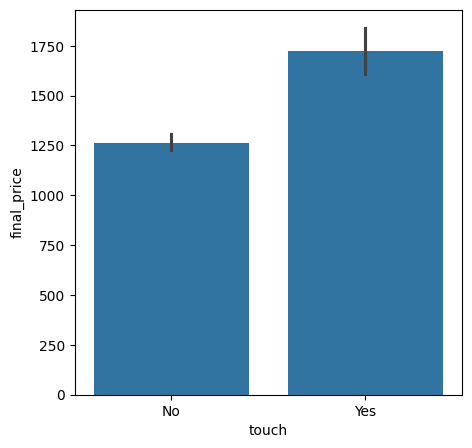

In [382]:
plot = plt.figure(figsize= (5,5))
sns.barplot(x = "touch", y = "final_price",data = df)

In [383]:
df.cpu.unique()

array(['Intel Core i5', 'Intel Celeron', 'Intel Core i3', 'Intel Core i7',
       'AMD Ryzen 5', 'AMD Ryzen 7', 'AMD Ryzen 3', 'Apple M1',
       'AMD Athlon', 'Apple M2', 'AMD Ryzen 9', 'Intel Core i9',
       'AMD 3020e', 'Qualcomm Snapdragon 7', 'Intel Evo Core i7',
       'Intel Evo Core i5', 'Intel Pentium', 'Apple M2 Pro',
       'AMD Radeon 5', 'Intel Evo Core i9', 'AMD 3015e', 'Apple M1 Pro',
       'Intel Core M3', 'AMD Radeon 9', 'Mediatek MT8183', 'AMD 3015Ce',
       'Qualcomm Snapdragon 8', 'Microsoft SQ1'], dtype=object)

In [384]:
df.storage.unique()

array([ 512,  256, 1000,   64,  128,   32,    0, 2000,  500, 4000, 3000,
        240], dtype=int64)

<Axes: xlabel='storage', ylabel='final_price'>

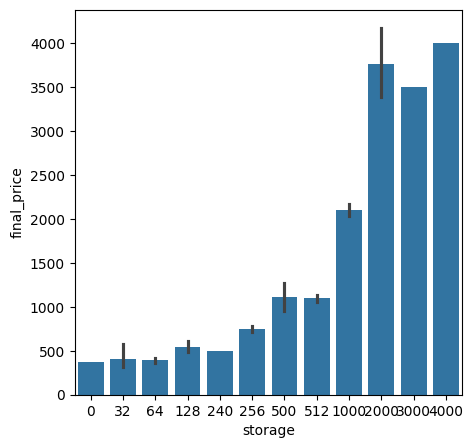

In [385]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x = "storage", y = "final_price", data = df)

In [386]:
df[["storage"]].corrwith(df.final_price)

storage    0.695631
dtype: float64

In [387]:
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

<Axes: xlabel='storage_type', ylabel='final_price'>

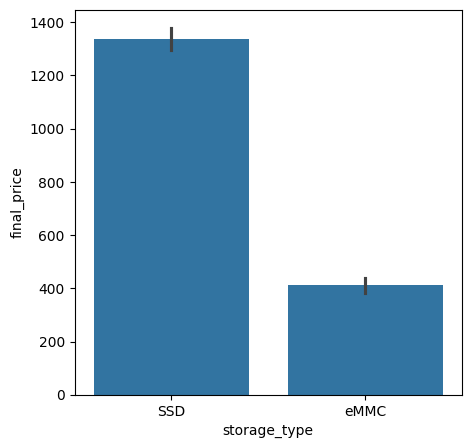

In [388]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x = "storage_type", y = "final_price", data = df)

In [389]:
df.gpu.unique()

array(['RTX 3050', 'RTX 4060', 'RTX 4050', 'RTX 3060', 'RTX 4070',
       'RTX 2050', 'GTX 1650', 'RTX 3070', '610 M', 'RTX 4080',
       'RX 6500M', 'MX 550', 'RTX 3080', 'RTX 4090', 'RX 7600S', 'A 370M',
       'GTX 1660', 'RTX A1000', 'RTX 3000', 'T 1200', 'Radeon Pro 5300M',
       'A 730M', 'Radeon Pro RX 560X', 'RTX A5500', 'Radeon Pro 5500M',
       'T 500', 'T 550', 'RTX A3000', 'T 2000', 'T 600', 'T 1000',
       'Radeon RX 6600M', 'MX 330', 'RTX A2000', 'MX 450', 'RTX 2070',
       'RX 6800S', 'RTX 2080', 'RTX 2060', 'GTX 1050', 'MX 130', 'P 500',
       'RX 6700M', 'GTX 1070'], dtype=object)

            SPLITTING THE DATA

In [390]:
from sklearn.model_selection import train_test_split

In [396]:
df_full, df_test = train_test_split(df, test_size = 0.2, random_state =3)
df_train, df_val = train_test_split(df_full, test_size = 0.2, random_state = 3)

In [397]:
df_full = df_full.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)

In [398]:
y_full = df_full["final_price"].round()
y_test = df_test["final_price"].round()
y_val = df_val["final_price"].round()
y_train = df_train["final_price"].round()

In [399]:
del df_full["final_price"]
del df_full["laptop"]
del df_test["final_price"]
del df_test["laptop"]
del df_val["final_price"]
del df_val["laptop"]
del df_train["final_price"]
del df_train["laptop"]

In [400]:
from sklearn.feature_extraction import DictVectorizer

In [401]:
dv = DictVectorizer(sparse = False)

In [402]:
x_full = df_full.to_dict(orient = "records")
x_test = df_test.to_dict(orient = "records")
x_val = df_val.to_dict(orient = "records")
x_train = df_train.to_dict(orient = "records")

In [432]:
dv.fit(x_train)

DictVectorizer(sparse=False)

In [433]:
train = dv.transform(x_train)

In [434]:
val = dv.transform(x_val)

In [555]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

                                LINEAR REGRESSION

In [444]:
lr = LinearRegression()

In [445]:
lr.fit(train, y_train)

LinearRegression()

In [511]:
lr_pred = lr.predict(train)

In [533]:
ridge = Ridge()

In [534]:
lasso = Lasso()

In [535]:
ridge.fit(train, y_train)

Ridge()

In [547]:
rid_pred = ridge.predict(val)

In [548]:
rid_pred[:5]

array([1223.65695823,  934.70178309, 1315.86001889,  833.72122464,
       1230.29774753])

In [549]:
r2_score(y_val, rid_pred)

0.836039854009212

In [550]:
lasso.fit(train, y_train)

Lasso()

In [551]:
las_pred = lasso.predict(val)

In [552]:
las_pred[:5]

array([1266.87680355,  931.47655407, 1294.55213746,  891.88537806,
       1143.52380309])

In [553]:
r2_score(y_val, las_pred)

0.8286901562775966

In [554]:
y_val[:5]

0     999.0
1     886.0
2    1109.0
3     927.0
4    1065.0
Name: final_price, dtype: float64

In [556]:
y_train

0        519.0
1       2999.0
2       1782.0
3        895.0
4       1680.0
         ...  
1377    2539.0
1378    1654.0
1379    1129.0
1380     699.0
1381    1454.0
Name: final_price, Length: 1382, dtype: float64

In [451]:
r2_score(y_train, lr_pred)

0.8931967407861454

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [500]:
clf = DecisionTreeClassifier(max_depth = 1000)

In [501]:
train.shape

(1382, 208)

In [502]:
clf.fit(train, y_train)

DecisionTreeClassifier(max_depth=1000)

In [503]:
d_pred = clf.predict(train)

In [504]:
d_pred[:10]

array([ 519., 2999., 1028.,  895., 1550.,  652., 1999., 1254., 2099.,
        862.])

In [505]:
(d_pred == y_train).mean() * 100

74.45730824891461

In [506]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

In [507]:
accuracy_score(y_train, d_pred)

0.7445730824891461

In [509]:
confusion_matrix(y_train, d_pred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [422]:
from sklearn.ensemble import RandomForestClassifier

In [423]:
rd = RandomForestClassifier()

In [424]:
rd.fit(train, y_train)

RandomForestClassifier()

In [425]:
rd_pred = rd.predict(val)

In [426]:
val




array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [427]:
accuracy_score(y_val, rd_pred) * 100

3.4682080924855487